In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
import os
path = os.listdir(r'C:\Users\Admin\OneDrive\Documents\data\Brain_tumor\Training')
classes = {'notumor':0, 'pituitary':1}

In [13]:
import cv2
X = []
Y = []
for cls in classes:
    pth = os.path.join(r'C:\Users\Admin\OneDrive\Documents\data\Brain_tumor\Training', cls)
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [14]:
X = np.array(X)
Y = np.array(Y)

X_updated = X.reshape(len(X), -1)

In [15]:
np.unique(Y)

array([0, 1])

In [16]:
pd.Series(Y).value_counts()

0    1595
1    1457
dtype: int64

In [17]:
X.shape, X_updated.shape

((3052, 200, 200), (3052, 40000))

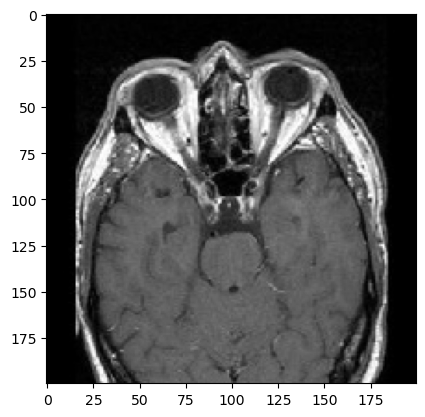

In [18]:
#Visulizing the data 
plt.imshow(X[0], cmap='gray')

In [19]:
#Preperation the data
X_updated = X.reshape(len(X), -1)
X_updated.shape

(3052, 40000)

In [21]:
#splitting of the data 
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,test_size=.20)

In [22]:
xtrain.shape, xtest.shape

((2441, 40000), (611, 40000))

In [23]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [25]:
from sklearn.decomposition import PCA
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(2441, 40000) (611, 40000)


In [26]:
#Training of the data 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [28]:
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

In [29]:
#Evaluation of the data
print("Training Score:", lg.score(xtrain, ytrain))
print("Testing Score:", lg.score(xtest, ytest))

Training Score: 1.0
Testing Score: 0.983633387888707


In [32]:
#Prediction of the data
pred = sv.predict(xtest)

In [33]:
misclassified=np.where(ytest!=pred)
misclassified

(array([  7,  83,  99, 247, 262, 284, 333, 468, 485, 550], dtype=int64),)

In [34]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  10
0 0


In [54]:
#Testing of the model
dec = {0:'notumor', 1:'pituitary'}

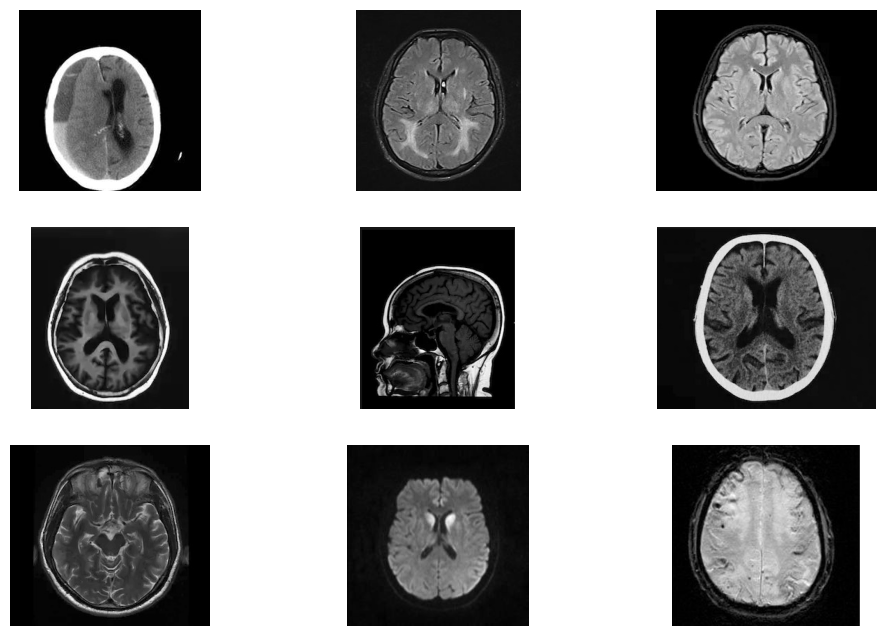

In [70]:
import cv2
import os
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))

path = r"C:\Users\Admin\OneDrive\Documents\data\Brain_tumor\Testing\notumor"
image_files = os.listdir(path)[:9]

for idx, image_file in enumerate(image_files, start=1):
    plt.subplot(3, 3, idx)
    
    # Join the file path using os.path.join() to ensure correct formatting
    img_path = os.path.join(path, image_file)
    img = cv2.imread(img_path, 0)
    
    # Check if the image is loaded successfully
    if img is not None:
        img1 = cv2.resize(img, (200, 200))
        img1 = img1.reshape(1, -1) / 255
        
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    else:
        print(f"Error loading image: {img_path}")

plt.show()


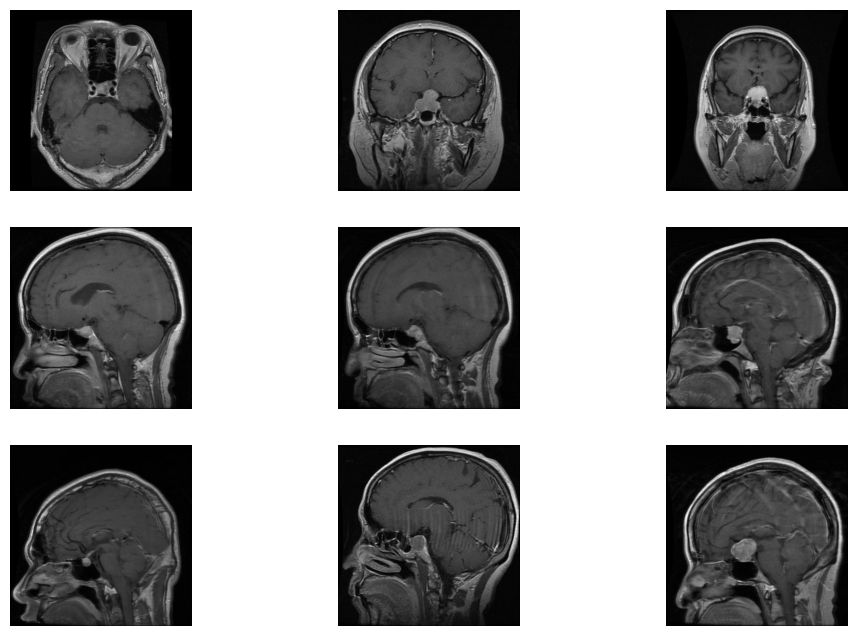

In [65]:
plt.figure(figsize=(12, 8))

path = r"C:\Users\Admin\OneDrive\Documents\data\Brain_tumor\Testing\pituitary"
image_files = os.listdir(path)[:9]

for idx, image_file in enumerate(image_files, start=1):
    plt.subplot(3, 3, idx)
    
    # Join the file path using os.path.join() to ensure correct formatting
    img_path = os.path.join(path, image_file)
    img = cv2.imread(img_path, 0)
    
    # Check if the image is loaded successfully
    if img is not None:
        img1 = cv2.resize(img, (200, 200))
        img1 = img1.reshape(1, -1) / 255
        
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    else:
        print(f"Error loading image: {img_path}")

plt.show()